In [40]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import math as m

In [16]:
# Collecting data
df=pd.read_csv(r"C:\Users\aryan\Downloads\Automobile_data.csv")
df=df.iloc[:,[2,3,4,5,6,7,8,10,11,12,13,14,15,16,21,23,24,25]]
df


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,2548,dohc,four,130,111,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,2548,dohc,four,130,111,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,171.2,65.5,52.4,2823,ohcv,six,152,154,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,176.6,66.2,54.3,2337,ohc,four,109,102,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,176.6,66.4,54.3,2824,ohc,five,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,188.8,68.9,55.5,2952,ohc,four,141,114,23,28,16845
201,volvo,gas,turbo,four,sedan,rwd,front,188.8,68.8,55.5,3049,ohc,four,141,160,19,25,19045
202,volvo,gas,std,four,sedan,rwd,front,188.8,68.9,55.5,3012,ohcv,six,173,134,18,23,21485
203,volvo,diesel,turbo,four,sedan,rwd,front,188.8,68.9,55.5,3217,ohc,six,145,106,26,27,22470


# Data cleaning


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make              205 non-null    object 
 1   fuel-type         205 non-null    object 
 2   aspiration        205 non-null    object 
 3   num-of-doors      205 non-null    object 
 4   body-style        205 non-null    object 
 5   drive-wheels      205 non-null    object 
 6   engine-location   205 non-null    object 
 7   length            205 non-null    float64
 8   width             205 non-null    float64
 9   height            205 non-null    float64
 10  curb-weight       205 non-null    int64  
 11  engine-type       205 non-null    object 
 12  num-of-cylinders  205 non-null    object 
 13  engine-size       205 non-null    int64  
 14  horsepower        205 non-null    object 
 15  city-mpg          205 non-null    int64  
 16  highway-mpg       205 non-null    int64  
 1

In [18]:
df.describe()

,length,width,height,curb-weight,engine-size,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,174.049268,65.907805,53.724878,2555.565854,126.907317,25.219512,30.751220
std,12.337289,2.145204,2.443522,520.680204,41.642693,6.542142,6.886443
min,141.100000,60.300000,47.800000,1488.000000,61.000000,13.000000,16.000000
25%,166.300000,64.100000,52.000000,2145.000000,97.000000,19.000000,25.000000
50%,173.200000,65.500000,54.100000,2414.000000,120.000000,24.000000,30.000000
75%,183.100000,66.900000,55.500000,2935.000000,141.000000,30.000000,34.000000
max,208.100000,72.300000,59.800000,4066.000000,326.000000,49.000000,54.000000


In [19]:
df.shape

(205, 18)

In [20]:
df.columns 

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [21]:
#replacing ? with NaN
df.replace("?", np.nan, inplace = True)

In [22]:
#checking total number of null values in each column
df.isnull().sum() 

make                0
fuel-type           0
aspiration          0
num-of-doors        2
body-style          0
drive-wheels        0
engine-location     0
length              0
width               0
height              0
curb-weight         0
engine-type         0
num-of-cylinders    0
engine-size         0
horsepower          2
city-mpg            0
highway-mpg         0
price               4
dtype: int64

In [23]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
df["num-of-doors"].replace(np.nan, "four", inplace=True)
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)


In [24]:
df.duplicated().sum()

0

# Data visualization


In [25]:
df[["price"]] = df[["price"]].astype("float")
df[["horsepower"]] = df[["horsepower"]].astype("float")

In [26]:
df.dtypes

make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
length              float64
width               float64
height              float64
curb-weight           int64
engine-type          object
num-of-cylinders     object
engine-size           int64
horsepower          float64
city-mpg              int64
highway-mpg           int64
price               float64
dtype: object

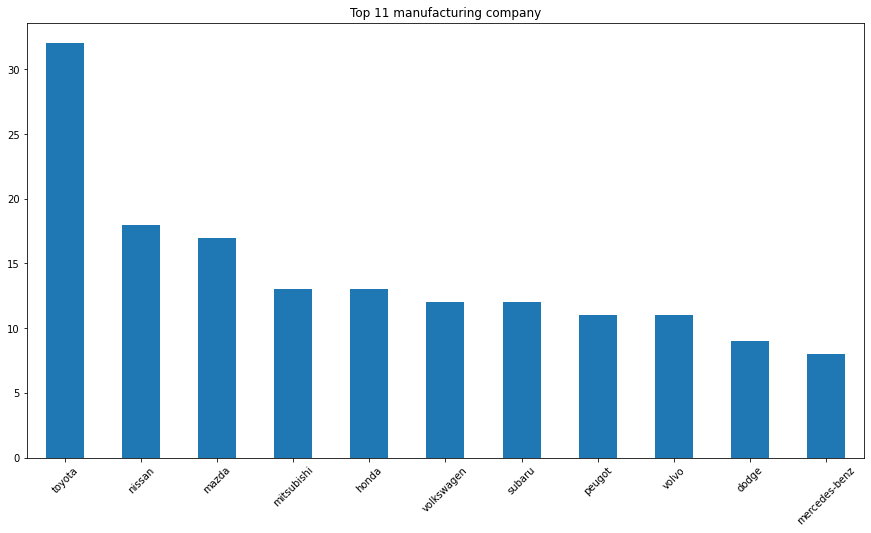

In [27]:
fig, ax = plt.subplots(figsize=(15,8))
df["make"].value_counts().head(11).plot.bar(ax=ax)
plt.xticks(rotation=45)
plt.title("Top 11 manufacturing company");

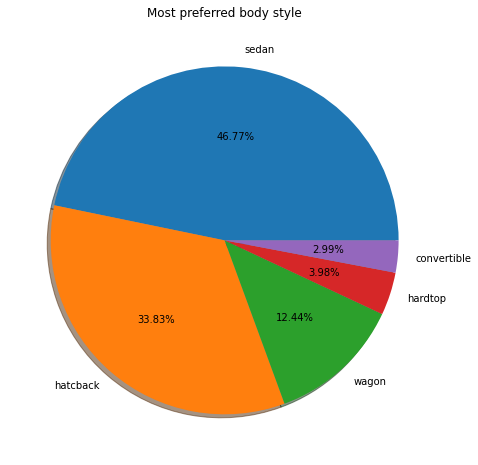

In [28]:
body = ['sedan', 'hatcback', 'wagon',
        'hardtop', 'convertible']
data = df["body-style"].value_counts()
fig = plt.figure(figsize =(15, 8))
plt.pie(data, labels = body,autopct='%1.2f%%', shadow=True)
plt.title("Most preferred body style");

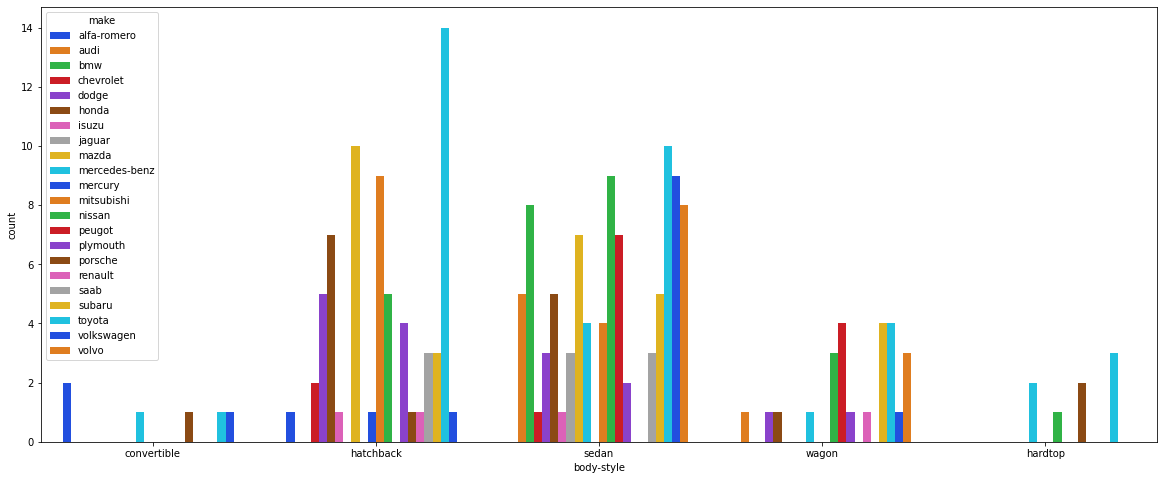

In [29]:
fig, ax = plt.subplots(figsize=(20,8))
sb.countplot(x='body-style', data=df, orient='h',hue='make',ax=ax,palette='bright');


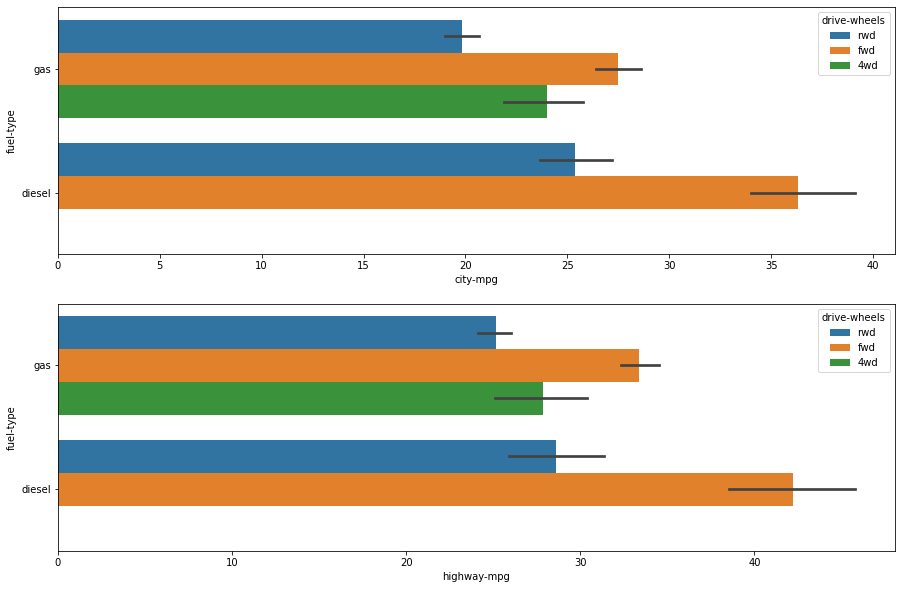

In [30]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(15,10))
sb.barplot(data=df, x="city-mpg", y="fuel-type",hue="drive-wheels",ax=ax1)
sb.barplot(data=df, x="highway-mpg", y="fuel-type",hue="drive-wheels",ax=ax2)
plt.show()

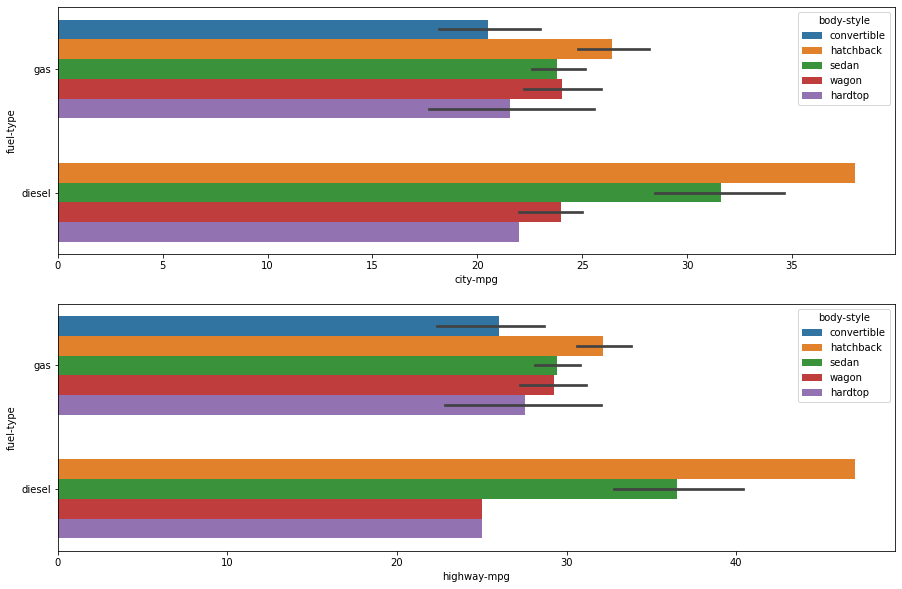

In [31]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(15,10))
sb.barplot(data=df, x="city-mpg",y="fuel-type",orient='h',hue="body-style",ax=ax1)
sb.barplot(data=df, x="highway-mpg",y="fuel-type",orient='h',hue="body-style",ax=ax2)
plt.show()

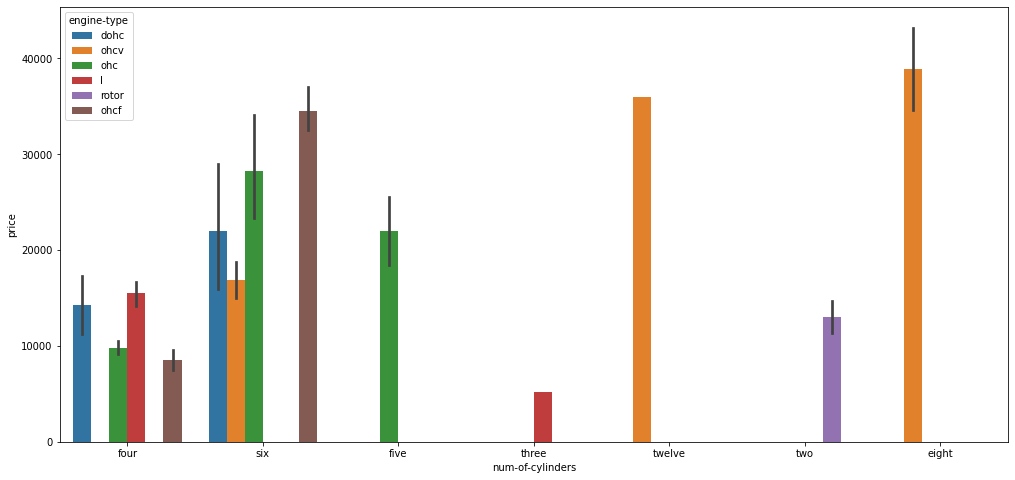

In [32]:
fig, ax = plt.subplots(figsize=(17,8))
sb.barplot(data=df,y="price",x='num-of-cylinders',hue="engine-type",ax=ax);

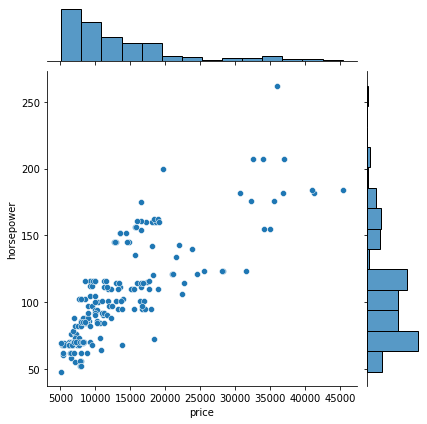

In [33]:
sb.jointplot(x='price', y='horsepower',data=df)


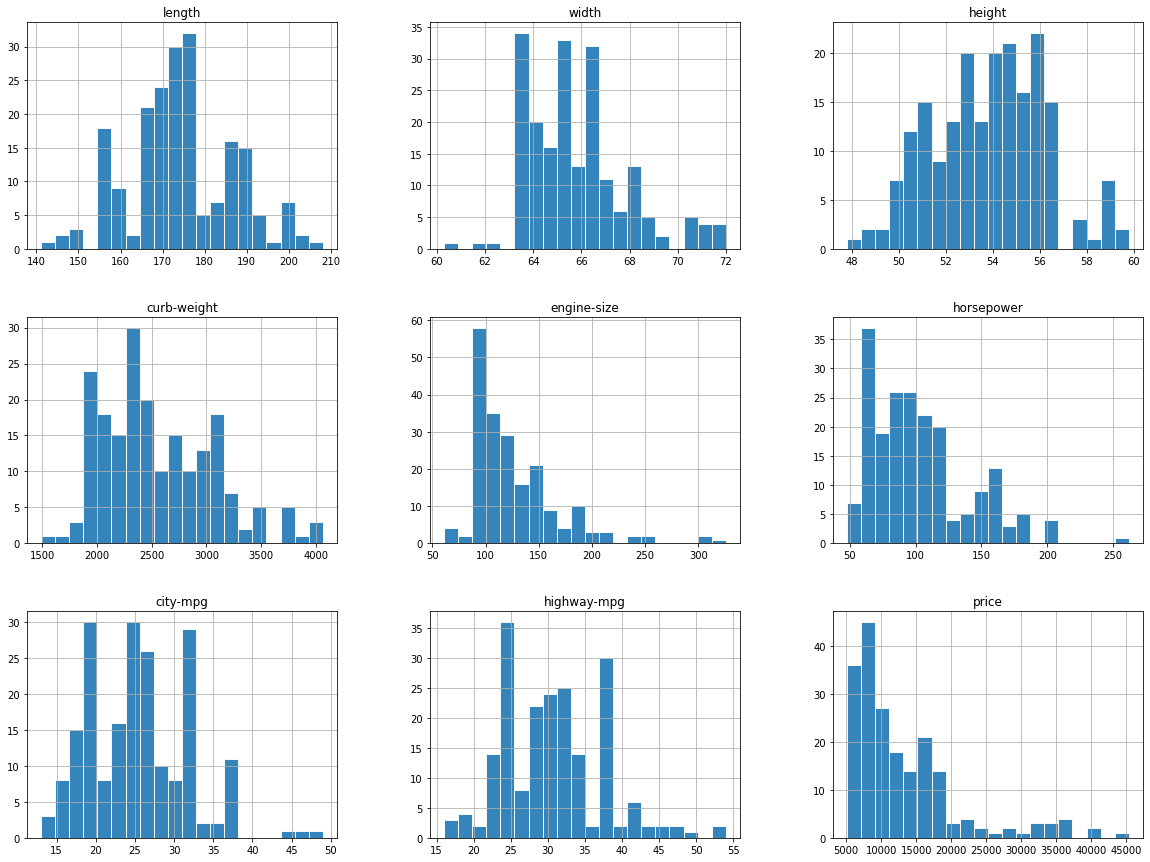

In [34]:
df.hist(figsize = (20,15),ec='white',bins=20,alpha=0.9)
plt.show()


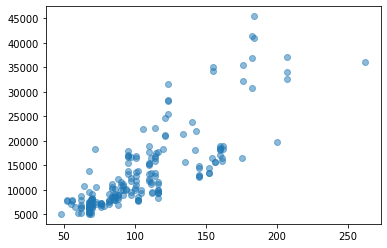

In [35]:
plt.scatter(df['horsepower'], df['price'], alpha=0.5)
plt.show()

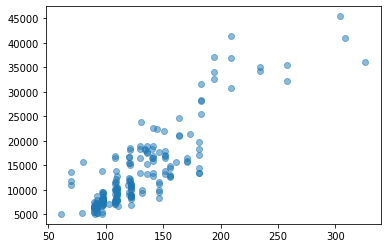

In [36]:
plt.scatter(df['engine-size'], df['price'], alpha=0.5)
plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_20224\3053308987.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Reds")


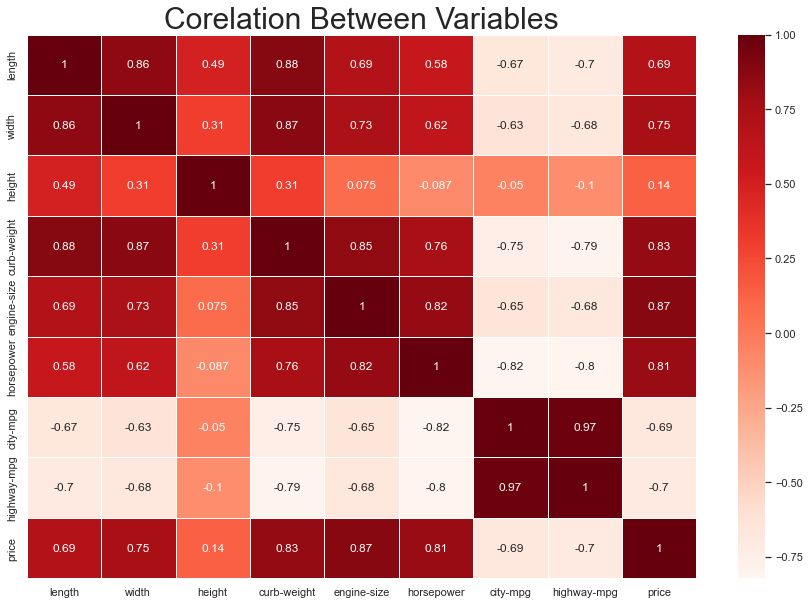

In [37]:
sb.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sb.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Reds")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_20224\2625560424.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


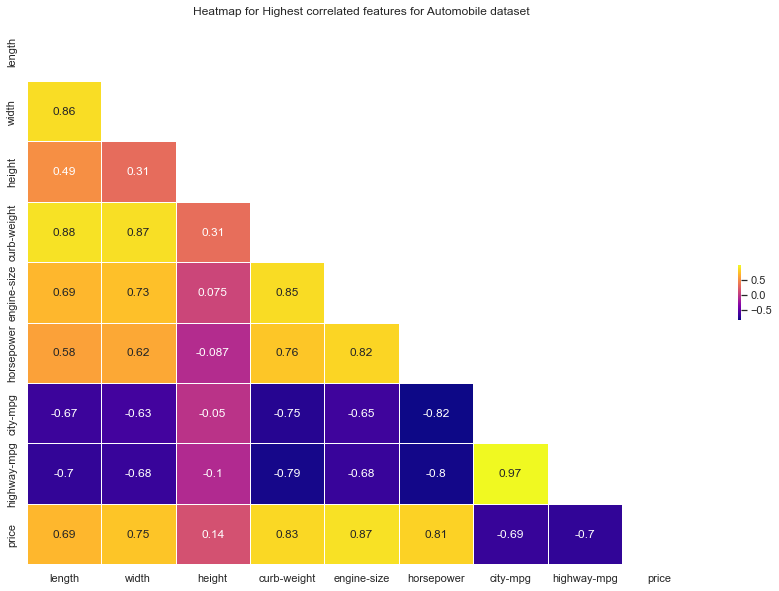

In [38]:
corr=df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 10))
sb.heatmap(corr, cmap='plasma', annot=True, ax=ax,
mask=mask, cbar_kws={'shrink': 0.10},linewidths=.5)
plt.title("Heatmap for Highest correlated features for Automobile dataset");

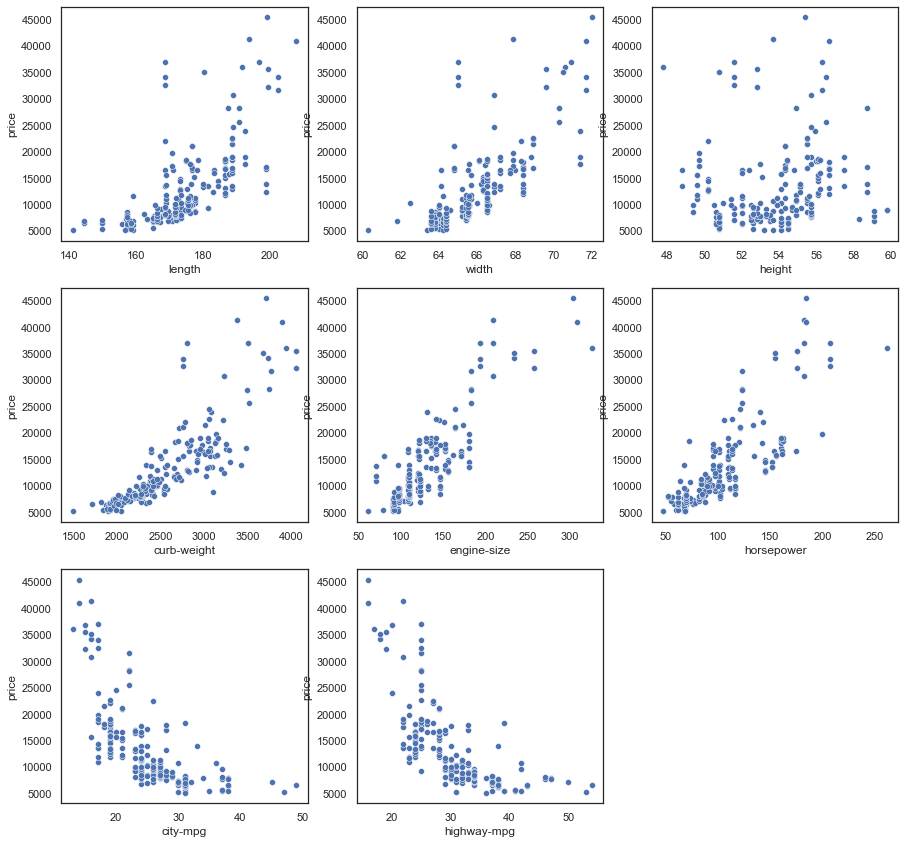

In [41]:
num_features = ['length','width','height','curb-weight','engine-size','horsepower','city-mpg','highway-mpg']
plt.figure(figsize = (15,25))
for i in enumerate (num_features):
    plt.subplot(5,3,i[0]+1)
    sb.scatterplot(x = i[1],y = 'price',data = df)

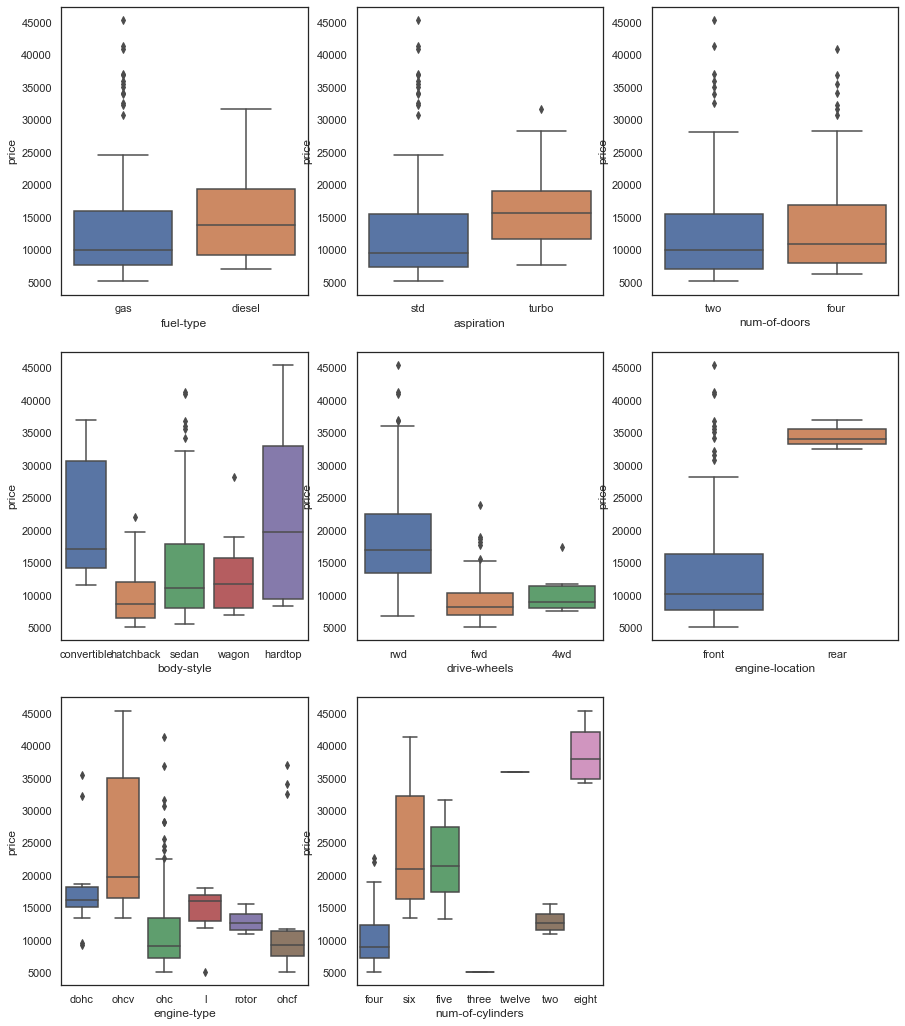

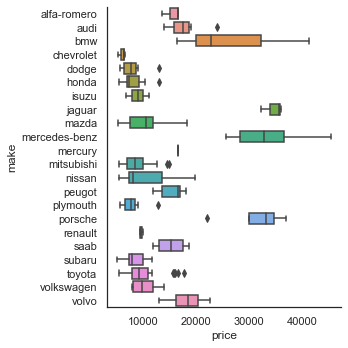

In [42]:
cat_features = ['fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
        'engine-type','num-of-cylinders']
plt.figure(figsize = (15,18))
for i in enumerate (cat_features):
    plt.subplot(3,3,i[0]+1)
    sb.boxplot(x = i[1],y = "price",data = df)
sb.catplot(y="make", x="price", kind="box", data=df)